In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, precision_recall_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as imp


from sklearn import metrics
from scipy import stats

from ModelTree import ModelTree

In [50]:
### GENERATE SAMPLE DATA ###
dataset = pd.read_csv('cleve.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

X1 = dataset.iloc[:,:-1]
y1= dataset.iloc[:, 13]


In [51]:
categorical_val = []
continous_val = []
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

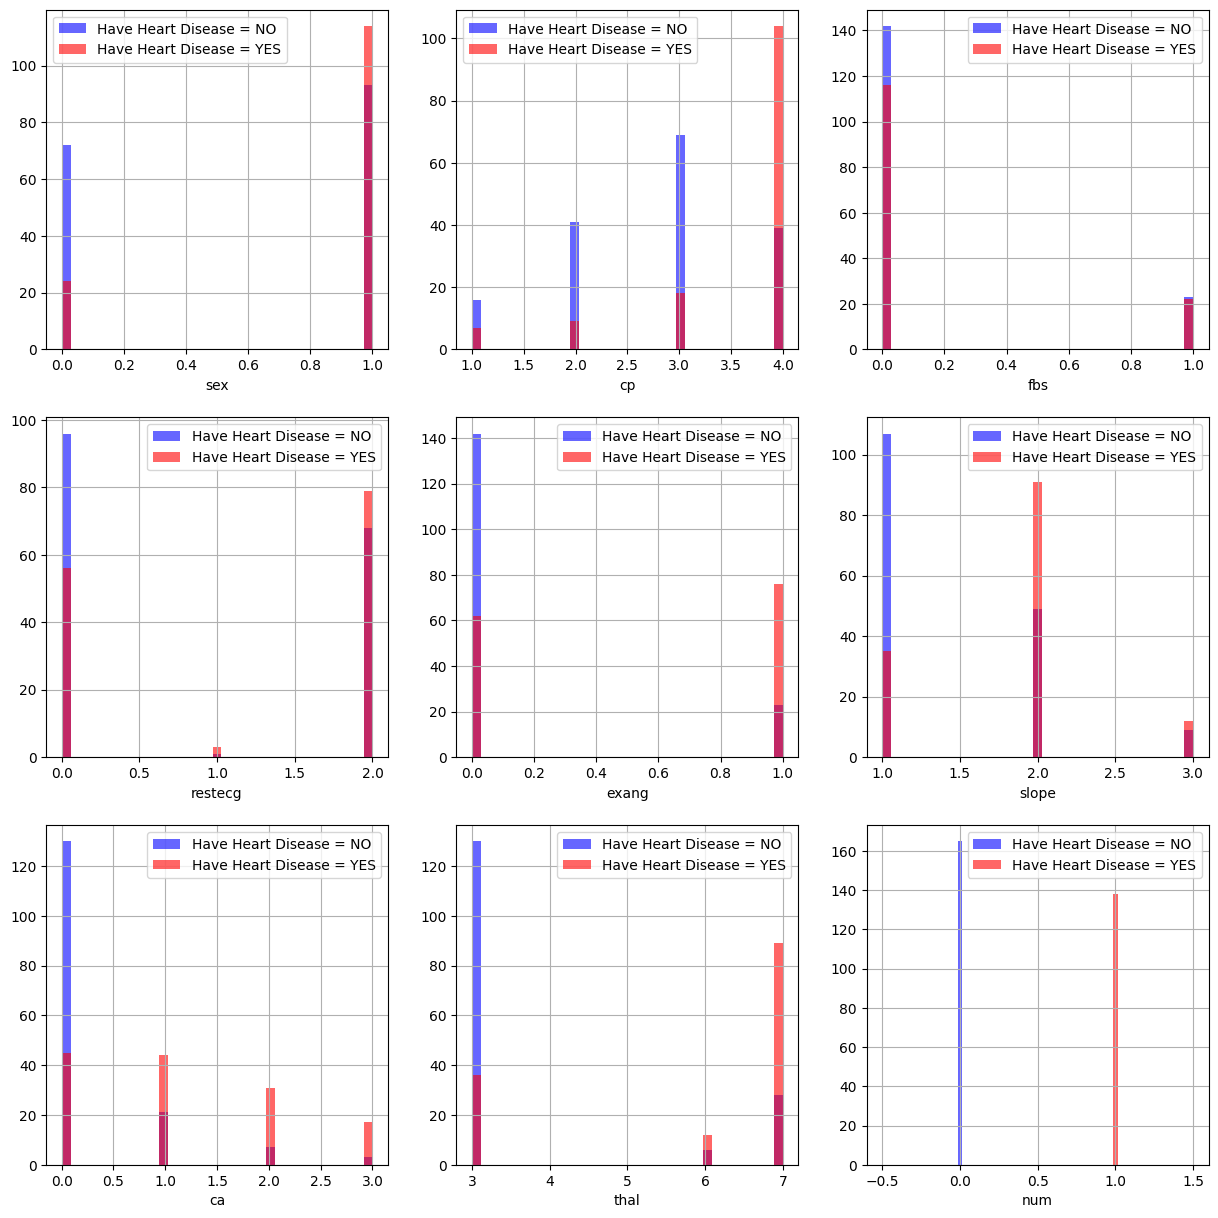

In [52]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    dataset[dataset["num"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["num"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

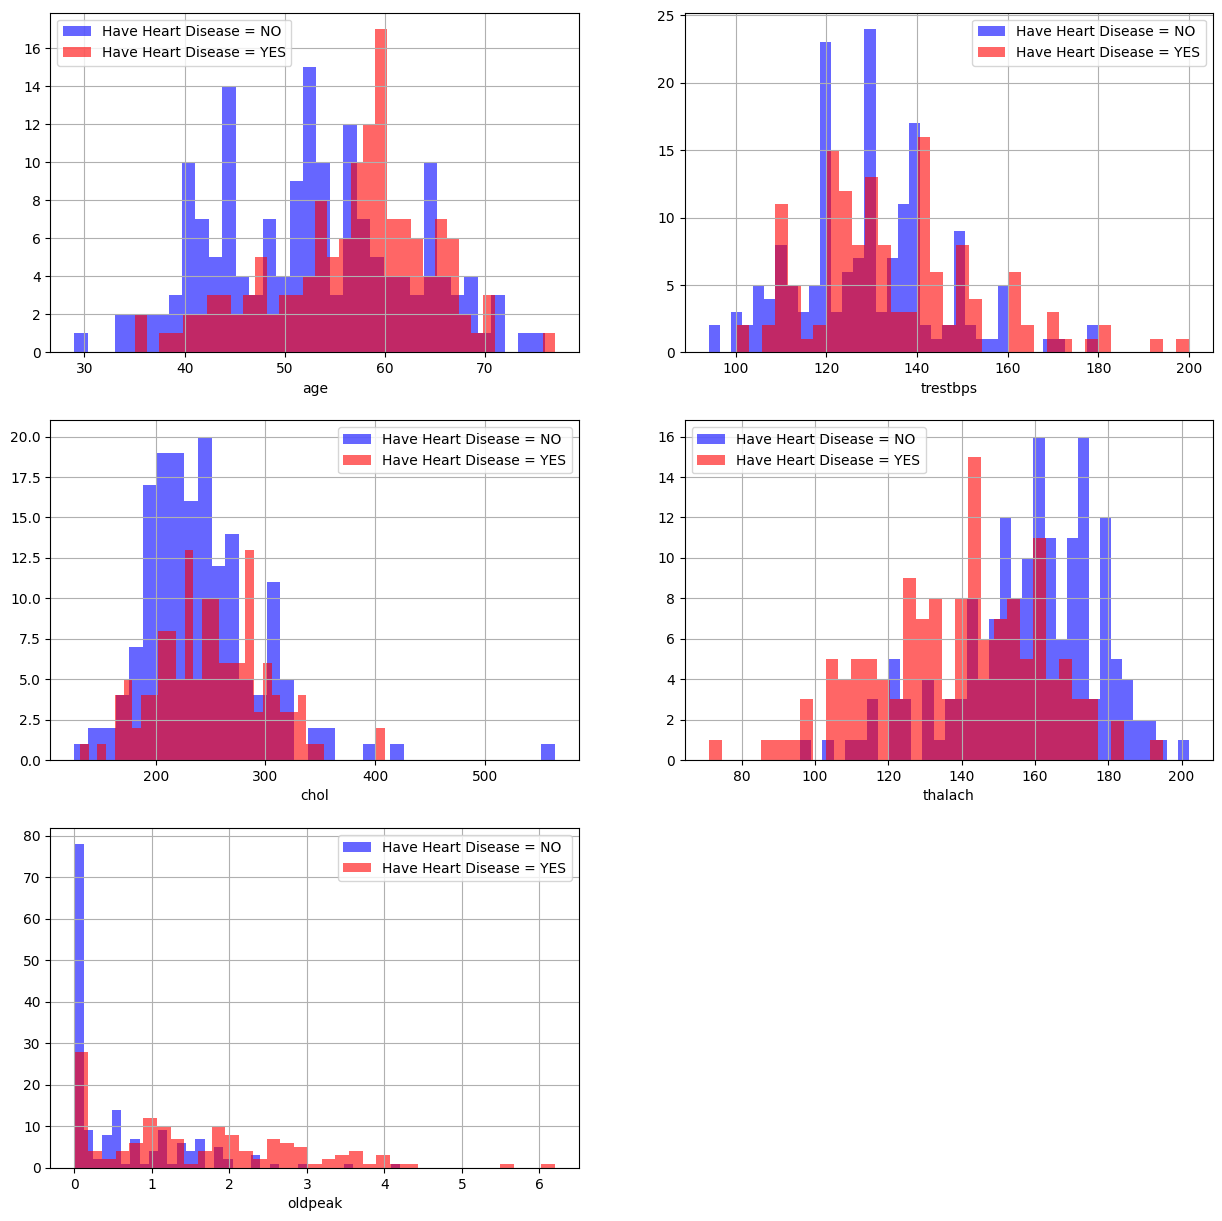

In [53]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    dataset[dataset["num"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["num"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(14.5, -0.5)

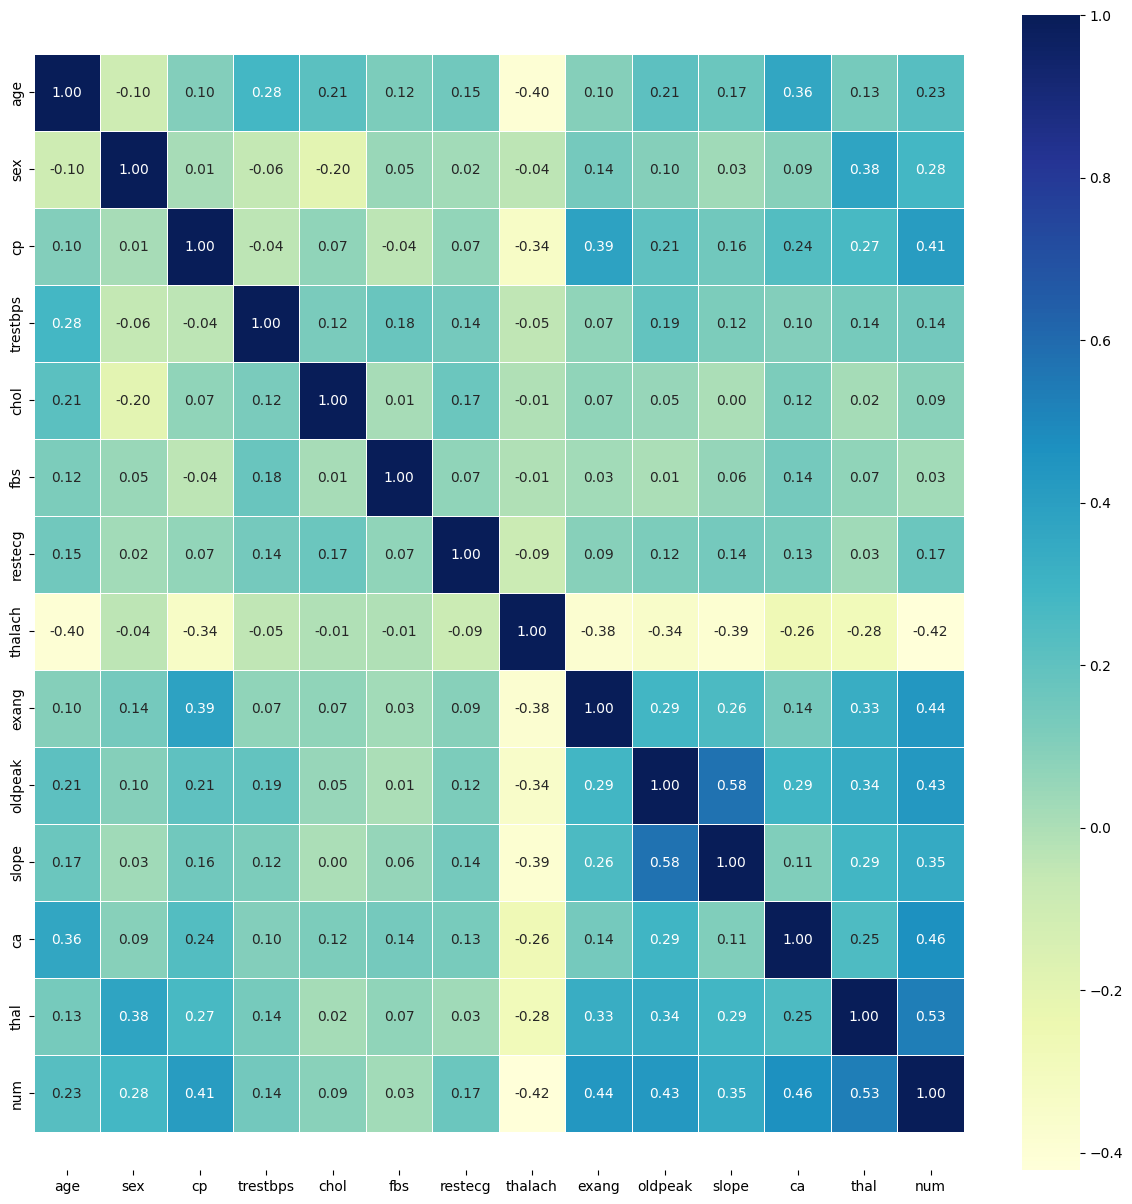

In [54]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

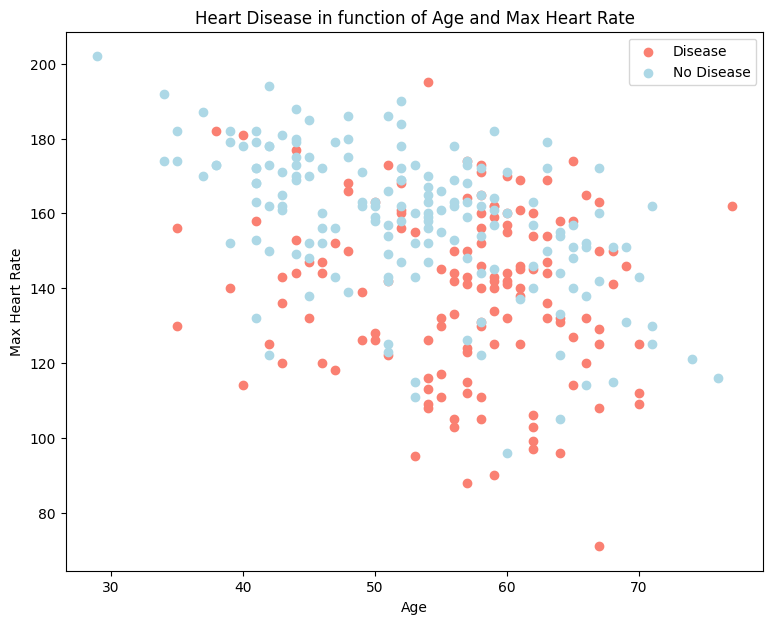

In [55]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(dataset.age[dataset.num==1], dataset.thalach[dataset.num==1], c="salmon")

# Scatter with negative examples
plt.scatter(dataset.age[dataset.num==0], dataset.thalach[dataset.num==0], c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

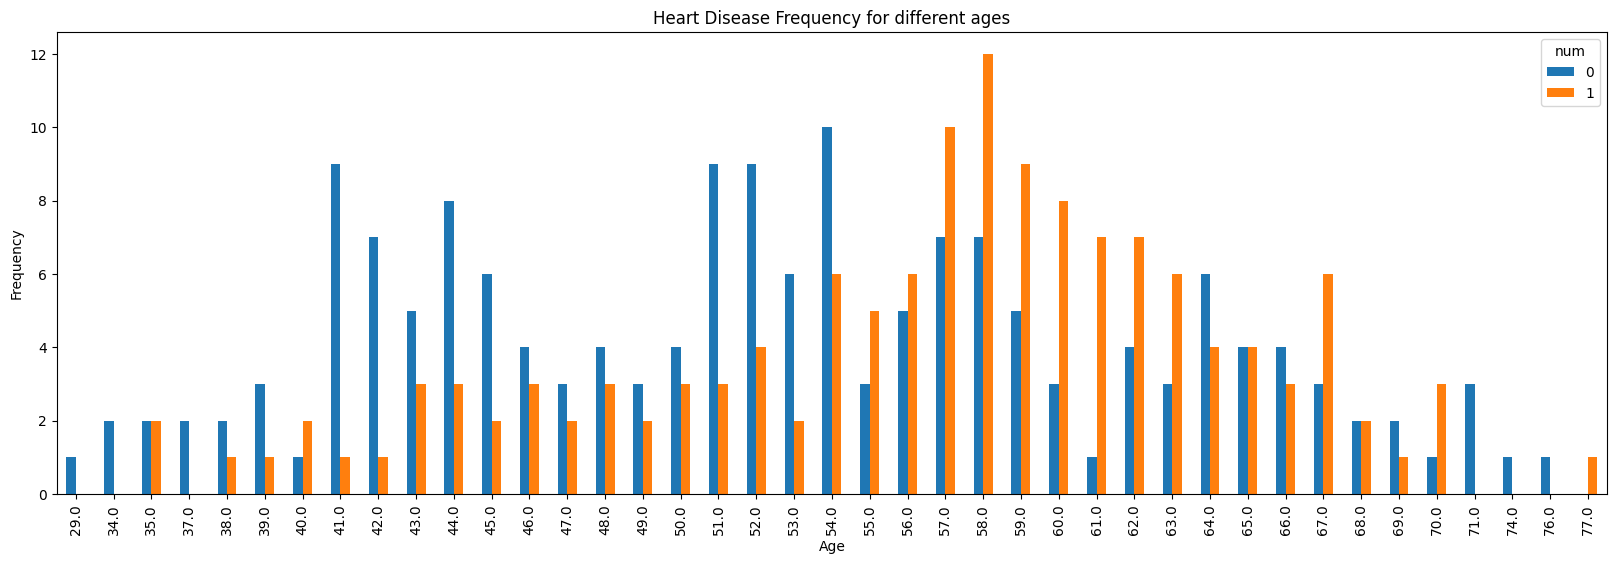

In [57]:
pd.crosstab(dataset.age,dataset.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for different ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot: xlabel='trestbps'>

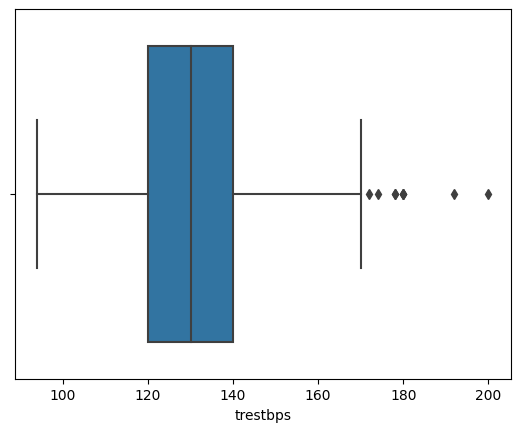

In [58]:
#Detecting Outliers
# Detecting Outliers using IQR (InterQuartile Range)

sns.boxplot(x=dataset['trestbps'])
#Some outliers are observed in 'trestbps'. They will be removed later

<AxesSubplot: xlabel='chol'>

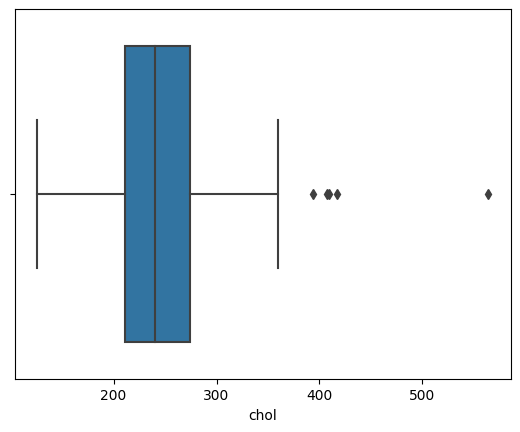

In [59]:

sns.boxplot(x=dataset['chol'])
#Some outliers are observed in 'chol'. They will be removed later

<AxesSubplot: xlabel='oldpeak'>

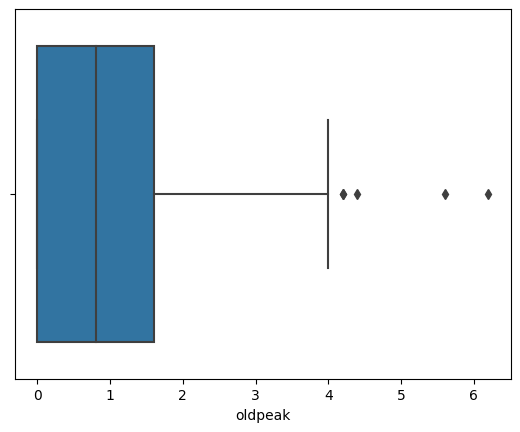

In [60]:
sns.boxplot(x=dataset['oldpeak'])
#Outliers are present in 'OldPeak'

In [61]:
#Find the InterQuartile Range
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

# Remove the outliers using IQR
data2 = dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

*********** InterQuartile Range ***********
age         13.5
sex          1.0
cp           1.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      2.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         4.0
num          1.0
dtype: float64


(216, 14)

In [62]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(dataset))
data3 = dataset[(z<3).all(axis=1)]
data3.shape

(0, 14)

In [ ]:
#OUTLIER DETECTION AND REMOVAL

sns.distplot(dataset['trestbps'])
sns.boxplot(dataset['trestbps'])

In [ ]:
upper_limit = data3['trestbps'].quantile(0.99)
lower_limit = data3['trestbps'].quantile(0.01)
new_df = dataset[(dataset['trestbps'] <= 150) & (dataset['trestbps'] >= 120)]

In [ ]:
sns.distplot(new_df['trestbps'])
sns.boxplot(new_df['trestbps'])

In [ ]:
dataset['oldpeak'] = np.where(dataset['oldpeak'] >= upper_limit, upper_limit, np.where(dataset['oldpeak'] <= lower_limit, lower_limit, dataset['oldpeak']))
sns.distplot(dataset['oldpeak'])
sns.boxplot(dataset['oldpeak'])


In [ ]:
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:, 13].values

In [ ]:
imputer=imp(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [ ]:
### FIT STANDARD RANDOM FOREST CLASSIFIER ###

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# classifier =RandomForestClassifier(n_estimators=100, random_state=5)
# classifier.fit(X_train, y_train)

# y_pred = classifier.predict(X_test)

# print(accuracy_score(y_test,y_pred))

# cm = confusion_matrix(y_test, y_pred)

# print(classification_report(y_test, y_pred))


In [ ]:
# feature_scores = pd.Series(classifier.feature_importances_, index=X1.columns).sort_values(ascending=False)

# sns.barplot(x=feature_scores, y=feature_scores.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.show()

In [ ]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# y_score = classifier.predict_proba(X_test)[:, 1]

# precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# plt.show()

In [ ]:
'''#Building classification models
names = ['age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(X_train, y_train)

#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(X_test)

#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = X_train.delete("fbs",axis=1)
x_train1 = x_train1.delete("trestbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = X_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trestbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))'''

In [ ]:
class logistic_regr:
    
    def __init__(self):
        self.model = LogisticRegression(penalty="l2",solver='liblinear')
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = list(set(y))
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return self.flag_y_pred * np.ones((len(X),), dtype=int)
        else:
            return self.model.predict(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

    def predict_proba(self,X):
        return self.model.predict_proba(X)

In [ ]:
esitmators=77  
y_pred=[]
n_train_split=int(len(X_train)/esitmators)
inital_train=0
final_train=0


yy_pred=[]

for i in range(1,esitmators):

    classifier =logistic_regr()

    final_train=i*n_train_split
    temp_X_train=X_train[inital_train:final_train]
    temp_y_train=y_train[inital_train:final_train]


    L=ModelTree(classifier,max_depth=88, min_samples_leaf=10)

    node=L.fit(temp_X_train,temp_y_train,verbose=False)
    classifier=node["model"]

    y_pred_temp=L.predict(X_test)
    yy_pred.append(y_pred_temp)

for j in range(len(yy_pred[0])):
    curr=[]
    for i in range(len(yy_pred)):
        curr.append(yy_pred[i][j])
    a=curr.count(0)
    b=curr.count(1)
    if a>b:
        y_pred.append(0)
    else:
        y_pred.append(1)
score=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
    

In [ ]:
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:, 13].values
# imputer=imp(missing_values=np.nan,strategy='mean')
# imputer=imputer.fit(X[:,11:13])
# X[:,11:13]=imputer.transform(X[:,11:13])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier =RandomForestClassifier(n_estimators=100, random_state=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

In [ ]:
feature_scores = pd.Series(classifier.feature_importances_, index=X1.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

In [ ]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_score = classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)